In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Which of $k$ chip brands sold at a convenience store are "the best"? 

Let $\mathbf x^{(t)}$ be a length $k$ vector counting the number of each kind of chip brand purchased by time $t$ (relative to some start time) on a given day. Assume $\mathbf x$ follows the ***multinomial distribution*** (with $t$ omitted for brevity)

$$p(\mathbf x | \mathbf p) = {\displaystyle {\frac {n!}{x_{1}!\cdots x_{k}!}}p_{1}^{x_{1}}\cdots p_{k}^{x_{k}}}$$

> A ***multinomial distribution*** generalizes the ***binary outcome*** of the ***binomial distribution*** to a ***categorical outcome***. So, a ***multinomial random variable*** also consists of $n$ "trials", but now there are $k$ possible outcomes as opposed to two ("success" or "failure"), and the observed nubmer of each of these outcomes (out of $n$ "trials") are recorded in $\mathbf x$.
> - The ***multinomial distribution*** is parameterized by a "probability vector" $\mathbf p$ of length $k$ which satisfies $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$) and where $p_j$ specifies the probabilities of the $j^{th}$ outcome of the $k$ categorical outcomes modeled by the ***multinomial distribution***. 

The ***Dirichlet distribution*** has the form (again omitting $t$ for brevity)

$$f(\mathbf p | \boldsymbol\alpha) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{j=1}^k p_j^{\alpha_j - 1} \quad E[p_j] = \frac{\alpha_j}{\sum_{j=1}^k \alpha_j} \quad \text{Var} [p_j]=\frac {E[p_j](1-E[p_j])}{1 + \sum_{j=1}^k \alpha_j} \quad \text{Cov}_{j\neq i}[p_j,p_i]=-\frac {E[p_j]E[p_i]}{1 + \sum_{j=1}^k \alpha_j}$$

and models a probability vector over a ***simplex***, meaning that $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$). 

> A ***Dirichlet distribution*** generalizes a ***beta distribution*** which models a "probability-valued" ***random variable*** which takes on values between $0$ and $1$. So, a ***Dirichlet random variable*** $\mathbf p$ is a vector of $k$ "probabilities" which sum to $1$.
> - The ***Dirichlet distribution*** is parameterized by the length $k$ vector $\boldsymbol\alpha$ where $\alpha_j>0$ for all $j$. As indicated by the expectation, variance, and covariance formulas above, the $\boldsymbol\alpha$ parameter vector controls the behavior of the actualizations of a ***Dirichlet random variable*** $\mathbf p$.  

In [7]:
# Example draw for n=10 from a Multinomial distribution
stats.multinomial(p=[0.2,0.5,0.2,0.1], n=10).rvs(size=1)[0]
# You can re-run the cell a few times to see example actualizations 
# of this multinomial random variable, and note it's relationship to `n`

array([1, 4, 5, 0])

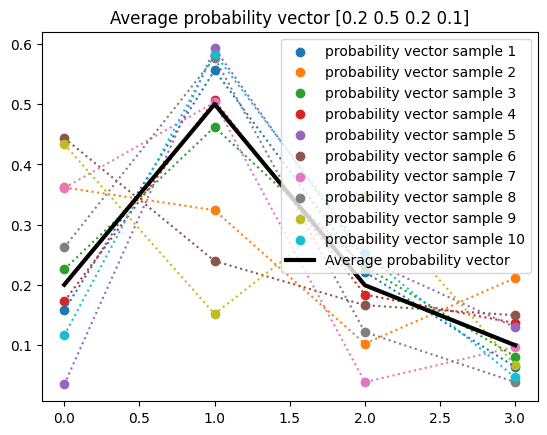

In [8]:
# Example draws from a Dirichlet distribution
plt.figure()
for i in range(10):
    p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1)[0]; plt.plot(p, ':')
    plt.scatter(x=[0,1,2,3], y=p, label="probability vector sample "+str(i+1))

p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000).mean(axis=0)
plt.plot(p, 'k', linewidth=3, label="Average probability vector"); 
plt.title("Average probability vector "+str(p.round(3))); plt.legend();

1. [1/2 points] Using the "chips example", describe how the sequence $\mathbf x^{(t)}$ would generally behave over time $t$ assuing time $t=0$ is when the convenience store begins counting chip purchases.

Overtime, the sequence x^(t) would accumulate chip brands in a manner that is proportional to the true probability of each chip brand being picked.

2. [1/2 points] Specify the distribution $p(\mathbf p | \mathbf x^{(t)})$, your belief about the "best chips" at time $t$ according to a Bayesian analysis.


p(p|x^(t)) is proporional to the joint probability p(p, x^(t)) so it is proportional to:
$$\prod_{j=1}^k p_j^{\alpha_j - 1 + x_j} $$
So it is a Dirichlet distribution.

3. [1/2 point] Provide code which samples from $p(p_j|\mathbf x^{(t)}=[2,5,2,1])$ which is one of the marginal distributions of $p(\mathbf p | \mathbf x^{(t)}=[2,5,2,1])$. 

- Hint 1: You do not have to analytically derive $p(p_j|\mathbf x^{(t)})$. You can sample from it just based on sampling from $p(\mathbf p | \mathbf x^{(t)})$.
- Hint 1: The $\alpha_j$ of the previous question now actually require chosen values. Use $1$ for each. 

In [10]:
x_t = np.array([2, 5, 2, 1])  # Observation vector
alpha = np.ones_like(x_t)     # Dirichlet prior parameters

# Sample from the conditional distribution p(p|xt)
p_sample = np.random.dirichlet(alpha + x_t)

# Extract the desired marginal probability
# For example, to sample from p(p_0 | x_t), you take the first element of p_sample
p_j_given_x_t = p_sample[0] 

4. [1/2 point] Provide code which estimates $\Pr(p_j>q|\mathbf x^{(t)}=[2,5,2,1])$ for some $q$ between $0$ and $1$.

In [12]:
def estimate_pr_greater_than_q(q, x_t, num_samples=10000):
    alpha = np.ones_like(x_t)
    p_samples = np.random.dirichlet(alpha + x_t, size=num_samples)
    num_samples_greater_than_q = np.sum(p_samples > q, axis=0)
    estimated_pr = num_samples_greater_than_q / num_samples
    
    return estimated_pr
x_t = np.array([2, 5, 2, 1])
q = 0.5
estimated_pr = estimate_pr_greater_than_q(q, x_t)
print(estimated_pr)

[0.0123 0.2865 0.0104 0.0021]


5. [1/2 point] Provide an interval quantifying your posterior uncertainty about the value of $p_j|\mathbf x^{(t)}=[2,5,2,1]$. 


In [17]:
x_t = np.array([2, 5, 2, 1])
alpha = 0.05
# Sample from the conditional distribution p(p|xt)
num_samples = 10000
p_samples = np.random.dirichlet(alpha + x_t, size=num_samples)
lower_bound = np.percentile((p_samples[:, j]), 100 * alpha / 2)
upper_bound = np.percentile((p_samples[:, j]), 100 * (1 - alpha / 2))
print(lower_bound, upper_bound)

0.028054068148936167 0.48865189081657484


6. [1/2 point] Provide code which estimates $\Pr(p_j>p_{j'}|\mathbf x^{(t)}=[2,5,2,1])$ for $j\neq j'$.

In [21]:
x_t = np.array([2, 5, 2, 1])

alpha = np.ones_like(x_t)
num_samples = 10000
p_samples = np.random.dirichlet(alpha + x_t, size=num_samples)
num_categories = len(x_t)
estimated_pr = np.zeros((num_categories, num_categories))
for j in range(num_categories):
    for j_prime in range(num_categories):
        if j != j_prime:
            num_samples_p_j_greater_than_p_j_prime = np.sum(p_samples[:, j] > p_samples[:, j_prime])
            estimated_pr[j, j_prime] = num_samples_p_j_greater_than_p_j_prime / num_samples

for j in range(len(x_t)):
    for j_prime in range(len(x_t)):
        if j != j_prime:
            print("Pr(p_{} > p_{}) = {}".format(j, j_prime, estimated_pr[j, j_prime]))

Pr(p_0 > p_1) = 0.1486
Pr(p_0 > p_2) = 0.5059
Pr(p_0 > p_3) = 0.6868
Pr(p_1 > p_0) = 0.8514
Pr(p_1 > p_2) = 0.8563
Pr(p_1 > p_3) = 0.9313
Pr(p_2 > p_0) = 0.4941
Pr(p_2 > p_1) = 0.1437
Pr(p_2 > p_3) = 0.6825
Pr(p_3 > p_0) = 0.3132
Pr(p_3 > p_1) = 0.0687
Pr(p_3 > p_2) = 0.3175


7. [1/2 points] Provide python code to sample from the distribution of $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $\frac{p_j}{p_{j'}}$.


In [24]:
x_t = np.array([2, 5, 2, 1])
j = 0
j_prime = 1
num_samples = 10000
alpha = np.ones_like(x_t)
p_samples = np.random.dirichlet(alpha + x_t, size=num_samples)
ratios = p_samples[:, j] / p_samples[:, j_prime]
confidence_level = 0.95
lower_bound = np.percentile(ratios, (1 - confidence_level) / 2 * 100)
upper_bound = np.percentile(ratios, (1 + confidence_level) / 2 * 100)

print(lower_bound, upper_bound)
#95% confident that the true value of p_j/p_j' is between 0.0907 and 1.85900

0.0930419085223047 1.8312060906235492


8. [1/2 points] Provide python code to sample from the distribution of $p\left(p_j - p_{j'} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $p_j - p_{j'}$. 

9. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ why are both $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$? and $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ relevant? What's different between these for $(j,j')=(2,3)$ as opposed to $(j,j')=(4,5)$?


Both posteriors are relevant as they provide different perspectives on the relationship between parameters p_j and p_j', where one is the absolute difference (p_j - p_j') and the other is a relative difference(p_j/p_j'). For (2, 3) the relative difference is 2, suggesting that one is twice as large as the other while for (4, 5) is also 2; however, for (2, 3) the abolute difference is higher at 0.2 while the abolute difference for (4, 5) is only 0.001.

10. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ what should be true about $t$ if we are examining 
$p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$?

Hint: refer back to problem 1.


Given that the probabilities are very low, if we are examining the two posteriors, then t must be very large to obtain any substantial evidence for either of the posteriors.